# Ejercicio predicción Variable Churned

Este es un ejercicio para realizar un modelo que pueda predecir la variable de renuncia de cliententes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# mostrar todas las columnas del dataframe
pd.set_option('display.max_columns', None)
# mostrar los numeros sin notacion cientifica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# leer df retail_data.csv
df_retail_data = pd.read_csv('retail_data.csv')

In [4]:
df_retail_data.head(10)

,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,occupation,transaction_id,transaction_date,product_id,product_category,quantity,unit_price,discount_applied,payment_method,store_location,transaction_hour,day_of_week,week_of_year,month_of_year,avg_purchase_value,purchase_frequency,last_purchase_date,avg_discount_used,preferred_store,online_purchases,in_store_purchases,avg_items_per_transaction,avg_transaction_value,total_returned_items,total_returned_value,total_sales,total_transactions,total_items_purchased,total_discounts_received,avg_spent_per_category,max_single_purchase_value,min_single_purchase_value,product_name,product_brand,product_rating,product_review_count,product_stock,product_return_rate,product_size,product_weight,product_color,product_material,product_manufacture_date,product_expiry_date,product_shelf_life,promotion_id,promotion_type,promotion_start_date,promotion_end_date,promotion_effectiveness,promotion_channel,promotion_target_audience,customer_zip_code,customer_city,customer_state,store_zip_code,store_city,store_state,distance_to_store,holiday_season,season,weekend,customer_support_calls,email_subscriptions,app_usage,website_visits,social_media_engagement,days_since_last_purchase
0,1,56,Other,High,No,0,No,Divorced,3,Bachelor's,Self-Employed,503290,2020-10-11 10:08:52,1480,Electronics,8,49.720,0.500,Credit Card,Location A,18,Wednesday,27,7,411.130,Weekly,2021-09-11 04:22:38,0.020,Location A,55,86,8.640,171.830,0,750.400,563.160,69,367,415.010,114.280,679.250,0.280,Product D,Brand Y,2.500,560,48,0.400,Small,4.610,Red,Metal,2019-08-04 01:47:01,2022-05-28 14:54:02,250,271,20% Off,2021-07-14 14:28:42,2022-12-30 13:04:13,High,Online,New Customers,37848,City D,State Y,88500,City D,State Y,33.210,No,Spring,Yes,5,No,High,30,High,40
1,2,69,Female,Medium,No,2,No,Married,2,PhD,Unemployed,347796,2021-12-08 01:07:40,1597,Groceries,7,817.760,0.320,Credit Card,Location C,15,Friday,20,2,268.710,Daily,2021-05-16 12:01:16,0.330,Location C,48,2,9.600,20.180,4,551.600,7554.570,8,475,801.790,305.950,491.560,4.650,Product C,Brand X,4.700,413,80,0.300,Medium,0.840,Blue,Metal,2019-10-23 19:59:17,2022-12-19 08:04:41,180,631,Flash Sale,2021-09-23 04:26:09,2022-09-13 03:16:26,Low,Social Media,New Customers,44896,City A,State X,30046,City C,State X,62.560,No,Summer,Yes,6,No,High,40,Medium,338
2,3,46,Female,Low,No,5,No,Married,3,Bachelor's,Self-Employed,493688,2020-02-17 09:40:48,5142,Toys,8,270.300,0.350,Debit Card,Location A,9,Saturday,35,6,246.790,Weekly,2021-02-07 16:47:48,0.470,Location B,16,45,1.550,55.170,0,629.190,7564.140,73,138,264.310,426.700,938.260,7.300,Product B,Brand X,4.600,312,14,0.080,Medium,0.230,Green,Plastic,2018-05-12 08:00:29,2023-02-01 12:15:07,131,879,Flash Sale,2021-06-13 12:31:15,2022-03-13 00:53:35,Low,Online,New Customers,11816,City B,State X,26169,City A,State Y,83.040,Yes,Winter,Yes,2,Yes,Low,89,Medium,61
3,4,32,Female,Low,No,0,No,Divorced,2,Master's,Employed,861348,2020-08-13 00:43:14,8447,Toys,2,547.840,0.100,Credit Card,Location A,13,Friday,42,8,178.920,Weekly,2021-12-30 23:48:26,0.410,Location B,50,47,1.780,15.790,3,346.670,8125.920,20,158,192.930,689.580,644.310,7.310,Product A,Brand Z,1.100,110,69,0.090,Large,4.370,Blue,Wood,2019-11-15 16:17:29,2023-02-05 11:46:57,16,211,Buy One Get One Free,2021-05-23 05:42:48,2022-02-06 00:42:30,High,Social Media,Returning Customers,78604,City A,State Y,22667,City B,State Z,50.430,Yes,Winter,No,12,No,Low,12,Low,42
4,5,60,Female,Low,Yes,7,Yes,Divorced,2,Bachelor's,Employed,535835,2021-07-02 11:59:03,6025,Clothing,4,785.290,0.170,Mobile Payment,Location C,17,Monday,37,3,214.060,Yearly,2021-11-02 11:48:25,0.220,Location B,48,42,9.380,240.030,2,979.910,114.320,83,263,497.260,715.860,162.860,1.920,Product C,Brand X,3.800,172,25,0.390,Small,1.680,Red,Metal,2019-08-27 02:58:19,2023-10-05 08:13:07,57,862,Flash Sale,2021-04-19 04:55:32,2022-12-04 13:07:09,Medium,Online,New Customers,17760,City

1. **customer_id**: Identificación única del cliente.
2. **age**: Edad del cliente.
3. **gender**: Género del cliente.
4. **income_bracket**: Rango de ingresos del cliente (Alto, Medio, Bajo).
5. **loyalty_program**: Indica si el cliente está en un programa de lealtad.
6. **membership_years**: Años de membresía en el programa de lealtad.
7. **churned**: Indica si el cliente ha dejado de usar los servicios.
8. **marital_status**: Estado civil del cliente (Soltero, Casado, Divorciado, etc.).
9. **number_of_children**: Número de hijos del cliente.
10. **education_level**: Nivel educativo del cliente.
11. **employment_status**: Estado laboral del cliente.
12. **occupation**: Ocupación del cliente.
13. **household_size**: Tamaño del hogar del cliente.
14. **home_owner**: Indica si el cliente es propietario de una vivienda.
15. **region**: Región donde reside el cliente.
16. **city**: Ciudad donde reside el cliente.
17. **preferred_store**: Tienda preferida por el cliente.
18. **total_spent**: Total gastado por el cliente.
19. **average_transaction_value**: Valor promedio por transacción del cliente.
20. **frequency_of_visits**: Frecuencia de visitas del cliente a la tienda.
21. **total_items_purchased**: Total de artículos comprados por el cliente.
22. **average_items_per_visit**: Promedio de artículos comprados por visita.
23. **most_purchased_category**: Categoría de producto más comprada por el cliente.
24. **total_discounts_received**: Total de descuentos recibidos por el cliente.
25. **average_discount_per_visit**: Descuento promedio por visita del cliente.
26. **coupon_usage**: Indica si el cliente usa cupones.
27. **total_coupons_used**: Total de cupones usados por el cliente.
28. **last_coupon_used**: Fecha del último cupón usado por el cliente.
29. **total_returns**: Total de devoluciones realizadas por el cliente.
30. **return_rate**: Tasa de devoluciones del cliente.
31. **average_return_value**: Valor promedio de las devoluciones del cliente.
32. **most_returned_category**: Categoría de producto más devuelta por el cliente.
33. **total_online_purchases**: Total de compras en línea del cliente.
34. **total_in_store_purchases**: Total de compras en tienda física del cliente.
35. **online_purchase_rate**: Tasa de compras en línea del cliente.
36. **in_store_purchase_rate**: Tasa de compras en tienda física del cliente.
37. **preferred_payment_method**: Método de pago preferido por el cliente.
38. **total_spent_online**: Total gastado en compras en línea.
39. **total_spent_in_store**: Total gastado en compras en tienda física.
40. **online_spending_rate**: Tasa de gasto en línea del cliente.
41. **in_store_spending_rate**: Tasa de gasto en tienda física del cliente.
42. **average_online_transaction_value**: Valor promedio por transacción en línea.
43. **average_in_store_transaction_value**: Valor promedio por transacción en tienda física.
44. **number_of_credit_cards**: Número de tarjetas de crédito del cliente.
45. **preferred_credit_card**: Tarjeta de crédito preferida por el cliente.
46. **total_credit_limit**: Límite total de crédito del cliente.
47. **credit_card_usage_rate**: Tasa de uso de tarjeta de crédito del cliente.
48. **total_debt**: Deuda total del cliente.
49. **debt_to_income_ratio**: Relación deuda-ingreso del cliente.
50. **total_savings**: Ahorros totales del cliente.
51. **savings_to_income_ratio**: Relación ahorros-ingreso del cliente.
52. **financial_risk_tolerance**: Tolerancia al riesgo financiero del cliente.
53. **investment_preference**: Preferencia de inversión del cliente.
54. **total_invested**: Total invertido por el cliente.
55. **preferred_investment_type**: Tipo de inversión preferido por el cliente.
56. **average_annual_return**: Retorno anual promedio de las inversiones del cliente.
57. **total_loan_amount**: Monto total de préstamos del cliente.
58. **loan_type**: Tipo de préstamo del cliente.
59. **loan_interest_rate**: Tasa de interés del préstamo del cliente.
60. **loan_term**: Plazo del préstamo del cliente.
61. **total_loan_payments**: Total de pagos de préstamos del cliente.
62. **monthly_loan_payment**: Pago mensual del préstamo del cliente.
63. **loan_to_value_ratio**: Relación préstamo-valor del cliente.
64. **total_insurance_premiums**: Total de primas de seguro del cliente.
65. **preferred_insurance_type**: Tipo de seguro preferido por el cliente.
66. **insurance_coverage_amount**: Monto de la cobertura del seguro del cliente.
67. **insurance_claims**: Reclamaciones de seguro del cliente.
68. **total_claims_amount**: Monto total de reclamaciones del cliente.
69. **claim_approval_rate**: Tasa de aprobación de reclamaciones del cliente.
70. **customer_satisfaction**: Nivel de satisfacción del cliente.
71. **feedback_comments**: Comentarios de retroalimentación del cliente.
72. **customer_complaints**: Quejas del cliente.
73. **resolved_complaints**: Quejas resueltas del cliente.
74. **complaint_resolution_time**: Tiempo de resolución de quejas del cliente.
75. **distance_to_store**: Distancia a la tienda.
76. **holiday_season**: Indica si la compra se hizo en temporada de vacaciones.
77. **season**: Estación del año.
78. **weekend**: Indica si la compra se hizo en fin de semana.
79. **customer_support_calls**: Llamadas al soporte al cliente.
80. **email_subscriptions**: Suscripciones por correo electrónico.
81. **app_usage**: Uso de la aplicación.
82. **website_visits**: Visitas al sitio web.
83. **social_media_engagement**: Compromiso en redes sociales.
84. **days_since_last_purchase**: Días desde la última compra.

In [5]:
# exporta las primeras 100 lineas a un excel 
df_retail_data.head(100).to_excel('retail_data_100.xlsx', index=False)

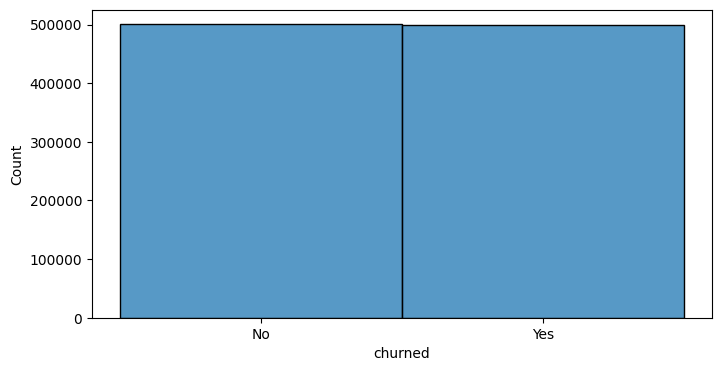

In [6]:
# grafica la distribucion de la columna 'churned' en un histograma

plt.figure(figsize=(8, 4))
sns.histplot(df_retail_data['churned'])
plt.show()

In [7]:
# analizar si hay valores nulos, mostrar todas las líneas y columnas
df_retail_data.isnull().sum() 


customer_id                 0
age                         0
gender                      0
income_bracket              0
loyalty_program             0
                           ..
email_subscriptions         0
app_usage                   0
website_visits              0
social_media_engagement     0
days_since_last_purchase    0
Length: 78, dtype: int64

In [8]:
# almacena en una tupla las columnas con formato fecha y posteriormente borralas del dataframe

date_columns = [col for col in df_retail_data.columns if 'date' in col] # esto es un list comprehension
df_retail_data.drop(columns=date_columns, inplace=True)

df_retail_data.head()

,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,occupation,transaction_id,product_id,product_category,quantity,unit_price,discount_applied,payment_method,store_location,transaction_hour,day_of_week,week_of_year,month_of_year,avg_purchase_value,purchase_frequency,avg_discount_used,preferred_store,online_purchases,in_store_purchases,avg_items_per_transaction,avg_transaction_value,total_returned_items,total_returned_value,total_sales,total_transactions,total_items_purchased,total_discounts_received,avg_spent_per_category,max_single_purchase_value,min_single_purchase_value,product_name,product_brand,product_rating,product_review_count,product_stock,product_return_rate,product_size,product_weight,product_color,product_material,product_shelf_life,promotion_id,promotion_type,promotion_effectiveness,promotion_channel,promotion_target_audience,customer_zip_code,customer_city,customer_state,store_zip_code,store_city,store_state,distance_to_store,holiday_season,season,weekend,customer_support_calls,email_subscriptions,app_usage,website_visits,social_media_engagement,days_since_last_purchase
0,1,56,Other,High,No,0,No,Divorced,3,Bachelor's,Self-Employed,503290,1480,Electronics,8,49.720,0.500,Credit Card,Location A,18,Wednesday,27,7,411.130,Weekly,0.020,Location A,55,86,8.640,171.830,0,750.400,563.160,69,367,415.010,114.280,679.250,0.280,Product D,Brand Y,2.500,560,48,0.400,Small,4.610,Red,Metal,250,271,20% Off,High,Online,New Customers,37848,City D,State Y,88500,City D,State Y,33.210,No,Spring,Yes,5,No,High,30,High,40
1,2,69,Female,Medium,No,2,No,Married,2,PhD,Unemployed,347796,1597,Groceries,7,817.760,0.320,Credit Card,Location C,15,Friday,20,2,268.710,Daily,0.330,Location C,48,2,9.600,20.180,4,551.600,7554.570,8,475,801.790,305.950,491.560,4.650,Product C,Brand X,4.700,413,80,0.300,Medium,0.840,Blue,Metal,180,631,Flash Sale,Low,Social Media,New Customers,44896,City A,State X,30046,City C,State X,62.560,No,Summer,Yes,6,No,High,40,Medium,338
2,3,46,Female,Low,No,5,No,Married,3,Bachelor's,Self-Employed,493688,5142,Toys,8,270.300,0.350,Debit Card,Location A,9,Saturday,35,6,246.790,Weekly,0.470,Location B,16,45,1.550,55.170,0,629.190,7564.140,73,138,264.310,426.700,938.260,7.300,Product B,Brand X,4.600,312,14,0.080,Medium,0.230,Green,Plastic,131,879,Flash Sale,Low,Online,New Customers,11816,City B,State X,26169,City A,State Y,83.040,Yes,Winter,Yes,2,Yes,Low,89,Medium,61
3,4,32,Female,Low,No,0,No,Divorced,2,Master's,Employed,861348,8447,Toys,2,547.840,0.100,Credit Card,Location A,13,Friday,42,8,178.920,Weekly,0.410,Location B,50,47,1.780,15.790,3,346.670,8125.920,20,158,192.930,689.580,644.310,7.310,Product A,Brand Z,1.100,110,69,0.090,Large,4.370,Blue,Wood,16,211,Buy One Get One Free,High,Social Media,Returning Customers,78604,City A,State Y,22667,City B,State Z,50.430,Yes,Winter,No,12,No,Low,12,Low,42
4,5,60,Female,Low,Yes,7,Yes,Divorced,2,Bachelor's,Employed,535835,6025,Clothing,4,785.290,0.170,Mobile Payment,Location C,17,Monday,37,3,214.060,Yearly,0.220,Location B,48,42,9.380,240.030,2,979.910,114.320,83,263,497.260,715.860,162.860,1.920,Product C,Brand X,3.800,172,25,0.390,Small,1.680,Red,Metal,57,862,Flash Sale,Medium,Online,New Customers,17760,City B,State Z,87843,City C,State X,36.550,Yes,Summer,Yes,3,No,Medium,31,Low,242


In [9]:
# haz un replace de los valores de la columna 'churned' donde No = 0 y Yes = 1

df_retail_data['churned'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [10]:
df_retail_data['income_bracket'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [11]:
# codificar las variables categoricas con one hot encoding con sklearn 
from sklearn.preprocessing import OneHotEncoder
# instanciar el objeto OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# codificar
encoded = ohe.fit_transform(df_retail_data.select_dtypes(include=['object']))

# convertir el resultado a un DataFrame
df_retail_data_encoded = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(df_retail_data.select_dtypes(include=['object']).columns))

# concatenar el DataFrame original con el DataFrame codificado
df_retail_data = pd.concat([df_retail_data.select_dtypes(exclude=['object']), df_retail_data_encoded], axis=1)

df_retail_data.head()

,customer_id,age,membership_years,churned,number_of_children,transaction_id,product_id,quantity,unit_price,discount_applied,transaction_hour,week_of_year,month_of_year,avg_purchase_value,avg_discount_used,online_purchases,in_store_purchases,avg_items_per_transaction,avg_transaction_value,total_returned_items,total_returned_value,total_sales,total_transactions,total_items_purchased,total_discounts_received,avg_spent_per_category,max_single_purchase_value,min_single_purchase_value,product_rating,product_review_count,product_stock,product_return_rate,product_weight,product_shelf_life,promotion_id,customer_zip_code,store_zip_code,distance_to_store,customer_support_calls,website_visits,days_since_last_purchase,gender_Female,gender_Male,gender_Other,income_bracket_High,income_bracket_Low,income_bracket_Medium,loyalty_program_No,loyalty_program_Yes,marital_status_Divorced,marital_status_Married,marital_status_Single,education_level_Bachelor's,education_level_High School,education_level_Master's,education_level_PhD,occupation_Employed,occupation_Retired,occupation_Self-Employed,occupation_Unemployed,product_category_Clothing,product_category_Electronics,product_category_Furniture,product_category_Groceries,product_category_Toys,payment_method_Cash,payment_method_Credit Card,payment_method_Debit Card,payment_method_Mobile Payment,store_location_Location A,store_location_Location B,store_location_Location C,store_location_Location D,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,purchase_frequency_Daily,purchase_frequency_Monthly,purchase_frequency_Weekly,purchase_frequency_Yearly,preferred_store_Location A,preferred_store_Location B,preferred_store_Location C,preferred_store_Location D,product_name_Product A,product_name_Product B,product_name_Product C,product_name_Product D,product_brand_Brand X,product_brand_Brand Y,product_brand_Brand Z,product_size_Large,product_size_Medium,product_size_Small,product_color_Black,product_color_Blue,product_color_Green,product_color_Red,product_color_White,product_material_Glass,product_material_Metal,product_material_Plastic,product_material_Wood,promotion_type_20% Off,promotion_type_Buy One Get One Free,promotion_type_Flash Sale,promotion_effectiveness_High,promotion_effectiveness_Low,promotion_effectiveness_Medium,promotion_channel_In-store,promotion_channel_Online,promotion_channel_Social Media,promotion_target_audience_New Customers,promotion_target_audience_Returning Customers,customer_city_City A,customer_city_City B,customer_city_City C,customer_city_City D,customer_state_State X,customer_state_State Y,customer_state_State Z,store_city_City A,store_city_City B,store_city_City C,store_city_City D,store_state_State X,store_state_State Y,store_state_State Z,holiday_season_No,holiday_season_Yes,season_Fall,season_Spring,season_Summer,season_Winter,weekend_No,weekend_Yes,email_subscriptions_No,email_subscriptions_Yes,app_usage_High,app_usage_Low,app_usage_Medium,social_media_engagement_High,social_media_engagement_Low,social_media_engagement_Medium
0,1,56,0,0,3,503290,1480,8,49.720,0.500,18,27,7,411.130,0.020,55,86,8.640,171.830,0,750.400,563.160,69,367,415.010,114.280,679.250,0.280,2.500,560,48,0.400,4.610,250,271,37848,88500,33.210,5,30,40,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
1,2,69,2,0,2,347796,1597,7,817.76

In [12]:
df_retail_data['churned']

0         0
1         0
2         0
3         0
4         1
         ..
999995    1
999996    1
999997    1
999998    1
999999    1
Name: churned, Length: 1000000, dtype: int64

In [14]:
# generar el dataframe de entrenamiento y el de prueba en un ratio 80/20 donde la variable objetivo es 'churned' 
from sklearn.model_selection import train_test_split

X = df_retail_data.drop(columns=['churned'])
y = df_retail_data['churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Identificando las variables que más aportan al modelo

muchas de estas técnicas son aplicables a distintos modelos a demás de las regresiones logísticas, incluidos los modelos de regresión lineal. 

**Feature Importance con un Modelo Árbol de Decisión**

Entrenar un modelo de árbol de decisión y extraer la importancia de las características puede darte una idea de qué columnas son más relevantes.

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print(feature_importance_df.head(10))  # Ver las 10 características más importantes

# alamacena en una lista las 10 caracteristicas mas importantes
top_10_features_random_forest = feature_importance_df['feature'].head(10).tolist()


                      feature  importance
20                total_sales       0.021
25  max_single_purchase_value       0.021
12         avg_purchase_value       0.021
0                 customer_id       0.021
24     avg_spent_per_category       0.021
23   total_discounts_received       0.021
35             store_zip_code       0.021
4              transaction_id       0.021
7                  unit_price       0.021
5                  product_id       0.021


**Recursive Feature Elimination (RFE)**

RFE es una técnica de selección de características que ajusta un modelo y elimina las características menos importantes hasta alcanzar un número deseado de características.

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(n_jobs=-1, random_state=42)
rfe = RFE(model, n_features_to_select=10)  # Número de características a seleccionar
rfe = rfe.fit(X_train, y_train)

print(rfe.support_)  # Características seleccionadas
print(rfe.ranking_)  # Ranking de todas las características

# alamacena en una lista las 10 caracteristicas mas importantes
top_10_features_recursive_feature_eliminator = X_train.columns[rfe.support_].tolist()


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False  True  True False False
 False False  True False False False False  True False False  True False
 False False False False False False False  True False False  True False
 False False False False False False False False False False False False
 False False False]
[ 54 114  55  23  57  53 125  46 134  31  39  26  42 107  35  34  25  47
  84  40  48  38  36  43  44  4

*Regularización (L1 o L2)*

Utiliza regularización para penalizar características menos importantes. L1 regularización (Lasso) puede forzar a ciertas características a tener coeficientes de cero, lo que puede ayudarte a seleccionar características.

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1', solver='liblinear', n_jobs=-1, random_state=42)  # Regularización L1
model.fit(X_train, y_train)

print(model.coef_)  # Coeficientes de las características

# alamacena en una lista las 10 caracteristicas mas importantes
top_10_features_logistic_regularitacion_L1_L2 = X_train.columns[np.abs(model.coef_[0]) > 0].tolist()


c:\Users\JavierVelosoRios\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 20.
  warnings.warn(


[[ 1.25097856e-08 -5.40093268e-05  7.48611987e-05  1.42708952e-03
  -9.91281664e-09  1.06518692e-08 -9.31223641e-05  1.82841019e-06
  -2.50039373e-03 -2.76237348e-04  4.29911406e-05 -5.53125581e-04
  -7.08542680e-06 -1.94265034e-02 -5.45791272e-05 -6.27455598e-05
  -7.78707726e-04  2.67639174e-06  2.58160235e-05  1.11212266e-05
  -9.38036327e-07 -3.75956988e-06  3.11368452e-05  4.38799614e-06
   3.51199456e-06  2.87375636e-06  6.86222908e-04  1.13136896e-05
   2.36333355e-06  1.21081090e-05  3.81571378e-02 -8.25767292e-04
   1.80456264e-05 -3.73509823e-07 -3.48867190e-08 -6.22475634e-08
  -1.55762706e-04  4.93310018e-04 -7.61930089e-05 -1.66017482e-05
   1.85102868e-03  0.00000000e+00 -3.02867175e-03  0.00000000e+00
  -1.43057282e-03  5.13482193e-03  0.00000000e+00  6.42489864e-04
   0.00000000e+00 -1.14787201e-03  7.23632571e-03 -1.96717940e-03
   5.44254762e-03  3.02550581e-03 -4.80452035e-03  1.56861260e-03
   1.43604836e-03 -1.85944057e-03 -2.44926777e-04 -6.54890800e-04
   6.61617

**Cross-Validation**

Implementa validación cruzada para evaluar cómo se desempeña el modelo en diferentes particiones de los datos. Esto puede ayudarte a ajustar mejor el modelo y seleccionar las características más relevantes.

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=200, random_state=42)
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f"Mean cross-validation score: {scores.mean()}")

# Ajustar el modelo antes de acceder a los coeficientes
model.fit(X_train_scaled, y_train)
top_10_features_cross_val_score = X_train.columns[np.abs(model.coef_[0]) > 0].tolist()

Mean cross-validation score: 0.49989624999999993


In [19]:
top_10_features_cross_val_score

['customer_id',
 'age',
 'membership_years',
 'number_of_children',
 'transaction_id',
 'product_id',
 'quantity',
 'unit_price',
 'discount_applied',
 'transaction_hour',
 'week_of_year',
 'month_of_year',
 'avg_purchase_value',
 'avg_discount_used',
 'online_purchases',
 'in_store_purchases',
 'avg_items_per_transaction',
 'avg_transaction_value',
 'total_returned_items',
 'total_returned_value',
 'total_sales',
 'total_transactions',
 'total_items_purchased',
 'total_discounts_received',
 'avg_spent_per_category',
 'max_single_purchase_value',
 'min_single_purchase_value',
 'product_rating',
 'product_review_count',
 'product_stock',
 'product_return_rate',
 'product_weight',
 'product_shelf_life',
 'promotion_id',
 'customer_zip_code',
 'store_zip_code',
 'distance_to_store',
 'customer_support_calls',
 'website_visits',
 'days_since_last_purchase',
 'gender_Female',
 'gender_Male',
 'gender_Other',
 'income_bracket_High',
 'income_bracket_Low',
 'income_bracket_Medium',
 'loyalty_

**PCA Análisis de Componentes Principales**

PCA es una técnica de reducción de dimensionalidad que transforma las características originales en un conjunto de nuevas características no correlacionadas (componentes principales). Puedes usar PCA para reducir la dimensionalidad del conjunto de datos mientras retienes la mayor parte de la variabilidad. Esto es aplicable a modelos como regresión lineal, logística, SVM, y otros.

In [20]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=10)  # Selecciona el número de componentes
X_pca = pca.fit_transform(X_train)

# Imprimir la varianza explicada por cada componente
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

# Obtener las características originales que más contribuyen a cada componente principal
n_top_features = 10
most_important_features = []

for i in range(pca.components_.shape[0]):
    component = pca.components_[i]
    indices = np.argsort(np.abs(component))[-n_top_features:]
    most_important_features.append(X_train.columns[indices].tolist())

# Imprimir las características más importantes para cada componente principal
for i, features in enumerate(most_important_features, 1):
    print(f"Component {i}: {features}")


[4.96761488e-01 4.95107067e-01 4.02299297e-03 4.00621084e-03
 4.96215706e-05 4.86423715e-05 4.97295378e-07 4.96404800e-07
 4.95427162e-07 4.94775702e-07]
0.999998005841776
Component 1: ['product_review_count', 'unit_price', 'max_single_purchase_value', 'promotion_id', 'total_sales', 'product_id', 'store_zip_code', 'customer_zip_code', 'customer_id', 'transaction_id']
Component 2: ['avg_purchase_value', 'total_returned_value', 'avg_spent_per_category', 'product_review_count', 'total_sales', 'product_id', 'store_zip_code', 'customer_zip_code', 'transaction_id', 'customer_id']
Component 3: ['product_shelf_life', 'promotion_id', 'unit_price', 'avg_spent_per_category', 'total_sales', 'product_id', 'customer_id', 'transaction_id', 'customer_zip_code', 'store_zip_code']
Component 4: ['total_returned_value', 'max_single_purchase_value', 'unit_price', 'total_discounts_received', 'product_id', 'customer_id', 'transaction_id', 'total_sales', 'store_zip_code', 'customer_zip_code']
Component 5: ['u

**SelectKBest**

Esta técnica selecciona las k mejores características basadas en una función de puntuación. Es útil cuando quieres seleccionar las características más relevantes sin necesidad de construir un modelo completo.

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)  # Selecciona las 10 mejores características
X_new = selector.fit_transform(X_train, y_train)
print(selector.scores_)  # Puntuaciones de las características
print(selector.pvalues_)  # Valores p
print(selector.get_support())  # Características seleccionadas

# Obtener los nombres de las columnas de las características más importantes
top_10_features_select_k_best = X_train.columns[selector.get_support()].tolist()
print(top_10_features_select_k_best)  # Imprimir los nombres de las columnas

[2.63116389e+00 1.85923460e-01 9.58596753e-03 8.10655800e-01
 1.64168556e+00 8.57623702e-04 1.21234390e-02 5.86240425e-02
 3.35977221e-02 7.50466951e-01 8.44499324e-02 7.28756328e-01
 1.89472836e-01 1.63440276e+00 5.33540541e-01 7.11250735e-01
 8.11807526e-01 3.01115631e-02 1.17616240e-03 2.08664874e+00
 1.45900133e+00 2.15368433e-03 4.03777355e+00 3.18160958e-01
 2.32138624e-01 1.58950453e-01 7.71833762e-01 1.27162164e-04
 1.08088490e-01 2.24994082e-02 6.15588683e+00 1.16856975e+00
 7.47020469e-01 2.14866988e-03 1.78421008e-01 5.07195176e-01
 4.01986658e+00 1.62908526e+00 9.60788610e-01 6.40282806e-01
 5.11407146e-01 1.81517227e-02 7.22093217e-01 1.46433683e-01
 7.42898215e-01 1.54787335e+00 2.31234662e-02 2.31234662e-02
 4.04907650e-01 1.02270467e+00 2.71600028e+00 3.93349559e-01
 1.68999785e+00 4.76681232e-01 1.86005503e+00 1.26423268e-01
 1.09961175e-01 3.02512529e-01 1.87594463e-02 9.24271425e-05
 1.00909914e-01 7.73078108e-01 4.18458675e-02 1.98652083e+00
 1.44039263e-01 4.365636

**Mutual Information**

La información mutua mide la dependencia entre dos variables. A diferencia de la correlación, puede captar relaciones no lineales. Es útil para seleccionar características en cualquier tipo de modelo.

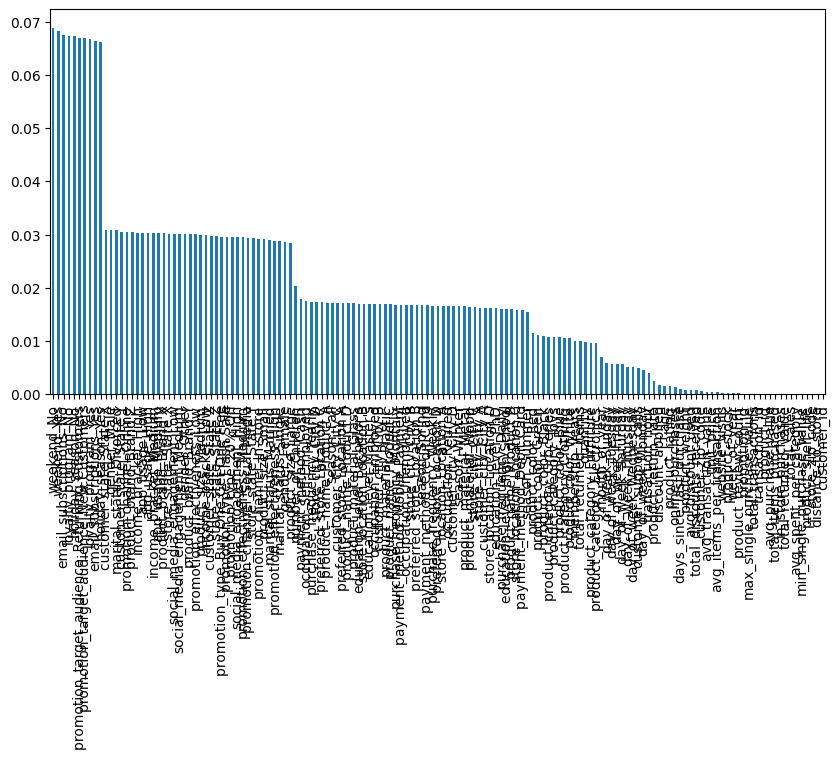

In [22]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi, index=X_train.columns)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))

# almacena en una lista las 10 caracteristicas mas importantes
top_10_features_mutual_information = mi.sort_values(ascending=False).head(10).index.tolist()

In [23]:
top_10_features_mutual_information

['weekend_No',
 'weekend_Yes',
 'email_subscriptions_No',
 'loyalty_program_No',
 'holiday_season_No',
 'promotion_target_audience_Returning Customers',
 'promotion_target_audience_New Customers',
 'loyalty_program_Yes',
 'email_subscriptions_Yes',
 'holiday_season_Yes']

**Boruta**
Boruta es un algoritmo de selección de características basado en Random Forest que intenta encontrar todas las características relevantes para el resultado, más allá de las más importantes. Es un método robusto pero más intensivo computacionalmente


**Análisis de VIF (Variance Inflation Factor)**

En modelos lineales, el VIF es una técnica para detectar multicolinealidad entre las características. Si el VIF de una característica es alto, indica que está correlacionada con otras características y puede ser eliminada.



from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

# Calculate VIF for each feature and handle potential KeyboardInterrupt
try:
    vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
except KeyboardInterrupt:
    print("VIF calculation interrupted. Partial results will be displayed.")
    vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) if i < len(vif_data) else None for i in range(len(X_train.columns))]

print(vif_data)


**Sequential Feature Selector**

Esta técnica es común en la estadística, particularmente en la construcción de modelos de regresión, y se puede aplicar a la selección de características en modelos de machine learning.

Existen dos variantes principales de esta técnica:

Forward Selection (Selección hacia adelante):

Comienza con un modelo vacío (sin variables).
Se añade la variable que más mejora el modelo (según un criterio como AIC, BIC, R², etc.).
Se repite el proceso, añadiendo una nueva variable en cada paso, hasta que la adición de nuevas variables no mejora significativamente el modelo.
Backward Elimination (Eliminación hacia atrás):

Comienza con todas las variables en el modelo.
Se elimina la variable que menos contribuye al modelo (según el mismo tipo de criterios).
Se repite el proceso, eliminando una variable en cada paso, hasta que la eliminación de nuevas variables empeora el modelo.
Stepwise Selection (Selección por pasos):

Es una combinación de las dos anteriores. Comienza como la selección hacia adelante, pero en cada paso también evalúa si alguna de las variables ya incluidas en el modelo puede ser eliminada.

In [24]:
# crea un nuevo dataframe para el entrenamiento y el de prueba con las 10 caracteristicas mas importantes
X_train_top_features = X_train[top_10_features_mutual_information]
X_test_top_features = X_test[top_10_features_mutual_information]

In [25]:
# entrena un modelo de regresion logistica con las 10 caracteristicas mas importantes

model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train_top_features, y_train)

# evalua el modelo con las 10 caracteristicas mas importantes
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_top_features)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


Accuracy: 0.50023


In [26]:
# crea un nuevo dataframe para el entrenamiento y el de prueba con las 10 caracteristicas mas importantes
X_train_top_features = X_train[top_10_features_select_k_best]
X_test_top_features = X_test[top_10_features_select_k_best]

# entrena un modelo de regresion logistica con las 10 caracteristicas mas importantes

model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train_top_features, y_train)

# evalua el modelo con las 10 caracteristicas mas importantes
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_top_features)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.500025


c:\Users\JavierVelosoRios\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 45s 878us/step - accuracy: 0.4980 - loss: 268.7969 - val_accuracy: 0.4983 - val_loss: 0.6957
Epoch 2/3
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 45s 890us/step - accuracy: 0.5005 - loss: 0.6965 - val_accuracy: 0.5017 - val_loss: 0.6932
Epoch 3/3
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 44s 879us/step - accuracy: 0.5002 - loss: 0.6932 - val_accuracy: 0.4983 - val_loss: 0.6932


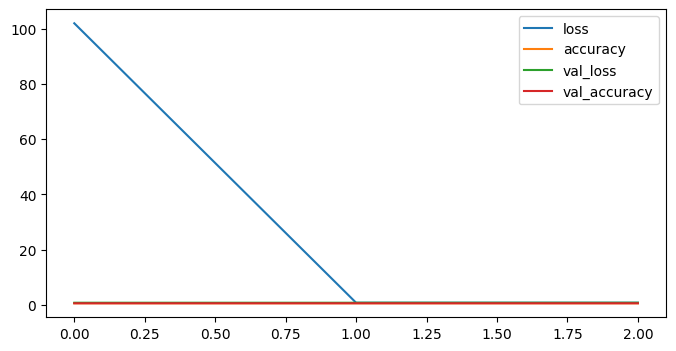

In [16]:
# creamos un modelo de red neuronal con keras 

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=3, batch_size=16, validation_data=(X_test, y_test))

# grafica la perdida y la precision del modelo
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()


Este código crea y entrena un modelo de red neuronal utilizando Keras, y luego grafica la pérdida y la precisión del modelo durante el entrenamiento. Aquí está la explicación paso a paso:

1. **Importaciones**:
   ```python
   from keras.models import Sequential
   from keras.layers import Dense
   ```
   Se importan las clases `Sequential` y `Dense` de Keras. `Sequential` se usa para crear un modelo secuencial, y `Dense` se usa para crear capas densas (totalmente conectadas).

2. **Creación del modelo**:
   ```python
   model = Sequential()
   ```
   Se crea una instancia del modelo secuencial.

3. **Añadir capas al modelo**:
   ```python
   model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
   model.add(Dense(1, activation='sigmoid'))
   ```
   - La primera capa densa tiene 10 neuronas, usa la función de activación `relu` y espera una entrada con la misma cantidad de características que [`X_train`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22c%3A%5C%5CUsers%5C%5CJavierVelosoRios%5C%5Cprojects%5C%5Cml_practica%5C%5Cml_retail_behavior.ipynb%22%2C%22_sep%22%3A1%2C%22path%22%3A%22%2Fc%3A%2FUsers%2FJavierVelosoRios%2Fprojects%2Fml_practica%2Fml_retail_behavior.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X16sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A6%2C%22character%22%3A0%7D%5D "c:\Users\JavierVelosoRios\projects\ml_practica\ml_retail_behavior.ipynb").
   - La segunda capa densa tiene 1 neurona y usa la función de activación `sigmoid`, adecuada para problemas de clasificación binaria.

4. **Compilación del modelo**:
   ```python
   model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
   ```
   Se compila el modelo especificando el optimizador `adam`, la función de pérdida `binary_crossentropy` (adecuada para clasificación binaria) y la métrica `accuracy` para evaluar el rendimiento.

5. **Entrenamiento del modelo**:
   ```python
   history = model.fit(X_train, y_train, epochs=3, batch_size=16, validation_data=(X_test, y_test))
   ```
   Se entrena el modelo con los datos de entrenamiento [`X_train`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22c%3A%5C%5CUsers%5C%5CJavierVelosoRios%5C%5Cprojects%5C%5Cml_practica%5C%5Cml_retail_behavior.ipynb%22%2C%22_sep%22%3A1%2C%22path%22%3A%22%2Fc%3A%2FUsers%2FJavierVelosoRios%2Fprojects%2Fml_practica%2Fml_retail_behavior.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X16sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A6%2C%22character%22%3A0%7D%5D "c:\Users\JavierVelosoRios\projects\ml_practica\ml_retail_behavior.ipynb") y [`y_train`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22c%3A%5C%5CUsers%5C%5CJavierVelosoRios%5C%5Cprojects%5C%5Cml_practica%5C%5Cml_retail_behavior.ipynb%22%2C%22_sep%22%3A1%2C%22path%22%3A%22%2Fc%3A%2FUsers%2FJavierVelosoRios%2Fprojects%2Fml_practica%2Fml_retail_behavior.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X16sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A6%2C%22character%22%3A17%7D%5D "c:\Users\JavierVelosoRios\projects\ml_practica\ml_retail_behavior.ipynb") durante 3 épocas, con un tamaño de lote de 16. También se proporciona un conjunto de validación ([`X_test`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22c%3A%5C%5CUsers%5C%5CJavierVelosoRios%5C%5Cprojects%5C%5Cml_practica%5C%5Cml_retail_behavior.ipynb%22%2C%22_sep%22%3A1%2C%22path%22%3A%22%2Fc%3A%2FUsers%2FJavierVelosoRios%2Fprojects%2Fml_practica%2Fml_retail_behavior.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X16sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A6%2C%22character%22%3A9%7D%5D "c:\Users\JavierVelosoRios\projects\ml_practica\ml_retail_behavior.ipynb"), [`y_test`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22c%3A%5C%5CUsers%5C%5CJavierVelosoRios%5C%5Cprojects%5C%5Cml_practica%5C%5Cml_retail_behavior.ipynb%22%2C%22_sep%22%3A1%2C%22path%22%3A%22%2Fc%3A%2FUsers%2FJavierVelosoRios%2Fprojects%2Fml_practica%2Fml_retail_behavior.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X16sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A6%2C%22character%22%3A26%7D%5D "c:\Users\JavierVelosoRios\projects\ml_practica\ml_retail_behavior.ipynb")) para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento.

6. **Graficar la pérdida y la precisión**:
   ```python
   plt.figure(figsize=(8, 4))
   plt.plot(history.history['loss'], label='loss')
   plt.plot(history.history['accuracy'], label='accuracy')
   plt.plot(history.history['val_loss'], label='val_loss')
   plt.plot(history.history['val_accuracy'], label='val_accuracy')
   plt.legend()
   plt.show()
   ```
   - Se crea una figura de tamaño 8x4.
   - Se grafica la pérdida (`loss`) y la precisión (`accuracy`) del entrenamiento y la validación a lo largo de las épocas.
   - Se añade una leyenda para identificar las curvas.
   - Se muestra la gráfica.

Este proceso permite visualizar cómo el modelo mejora (o no) durante el entrenamiento y la validación, ayudando a identificar problemas como el sobreajuste.

In [17]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │         1,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,475 (17.48 KB)

 Trainable params: 1,491 (5.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,984 (11.66 KB)